# Counting Words


This section introduces the basics of all text analysis - turning words into numbers. 

Begin by enabling plots to be displayed in the Jupyter notebook and importing the pandas library. 

In [11]:
%matplotlib inline

import pandas as pd

The sample text for this section are presidential State of the Union addresses. These were collected buy Constantine Lignos and made availabe on his [github](https://github.com/ConstantineLignos/StateoftheUnion/) page. 

Since CSV files aren't really well-designed to hold long text fields with line-breaks, quotation marks and commas (which might interpreted by a csv reader as the start of a new field), I stored the addresses in a json file format. This can be read by pandas and converted into a data frame.

In [12]:
sotu_df = pd.read_json('data/sotu.json')

ValueError: Expected object or value

As before, `info`, `head` and `tail` give a sense of the data.

In [3]:
sotu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 3 columns):
sotu_president    230 non-null object
sotu_text         230 non-null object
sotu_year         230 non-null int64
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


There are three columns with no missing data. `sotu_year` is the only numeric field.

In [4]:
sotu_df.head()

,sotu_president,sotu_text,sotu_year
0,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1790
1,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1791
2,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1792
3,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1793
4,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1794


A specific row can be referenced using its index through `iloc`. 

In [5]:
sotu_df.iloc[227]

sotu_president                                         Barack_Obama
sotu_text         Mr. Speaker, Mr. Vice President, Members of Co...
sotu_year                                                      2016
Name: 227, dtype: object

Here's what the first 800 characters of the variable `sotu_text` look like from a random row.

In [6]:
print(sotu_df.iloc[227]['sotu_text'][:800])

Mr. Speaker, Mr. Vice President, Members of Congress, my fellow
Americans:

Tonight marks the eighth year I have come here to report on the State of
the Union. And for this final one, I am going to try to make it shorter.
I know some of you are antsy to get back to Iowa.

I also understand that because it is an election season, expectations for
what we will achieve this year are low. Still, Mr. Speaker, I appreciate
the constructive approach you and the other leaders took at the end of
last year to pass a budget and make tax cuts permanent for working
families. So I hope we can work together this year on bipartisan
priorities like criminal justice reform, and helping people who are
battling prescription drug abuse. We just might surprise the cynics
again.

But tonight, I want to go easy on


# Word Count

One the simplest things one might want to know about text is how long is it. This could be useful for basic descriptive questions, such as "Have State of the Union Addresses increased in length over time?" Word counts are also useful for normalized texts. A 200 word essay with 10 exclamation marks is quite different from a 20,000 word essay with 10 exclamation marks 

Unfortunately, while there are many useful libraries for text analysis in Python, there isn't a simple way to use any of them to get words counts. Luckily, it is fairly straightforward to build one using Python's string methods. 

Start by storing a sample sentence as a string called `sentence`.

In [1]:
sentence = "Our allies will find that America is once again ready to lead."

By default, the string `split` method divides a string by spaces, tabs, and line breaks. It returns a list.

In [2]:
sentence.split()

['Our',
 'allies',
 'will',
 'find',
 'that',
 'America',
 'is',
 'once',
 'again',
 'ready',
 'to',
 'lead.']

The built-in function `len` will return the number of items in our list. By combining the two, it creates a one line word counter.

In [3]:
len(sentence.split())

12

Since we might want to use this word-counting technique in a variety of circumstances, it is convenient to place it in a small function.

In [4]:
def word_count(text_string):
    return len(text_string.split())

Since you might read your own code months later and think, "what was trying to do?", it best practice to document your functions. 

In [5]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [6]:
word_count(sentence)

12

It worked on the simple example, but it is helpful to check the functions robustness using a more complex example, such as one that includes tabs and line breaks.

In [7]:
tricky_sentence = 'This\thas tabs and\nline breaks.'
print(tricky_sentence)

This	has tabs and
line breaks.


In [8]:
word_count(tricky_sentence)

6

Now that the function exists, it can applied to our text variable, `sotu_text` to create a new variable with the number of words in the address.

In [9]:
sotu_df['sotu_word_count'] = sotu_df['sotu_text'].apply(word_count)

NameError: name 'sotu_df' is not defined

`describe`, `hist`, and `scatter` can provide some information on the new variable.

In [16]:
sotu_df['sotu_word_count'].describe()

count      230.000000
mean      7729.513043
std       5417.866953
min       1372.000000
25%       4018.250000
50%       6149.500000
75%       9517.500000
max      33564.000000
Name: sotu_word_count, dtype: float64

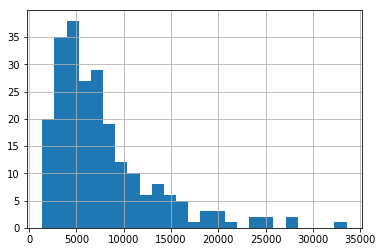

In [17]:
sotu_df['sotu_word_count'].hist(bins = 25)

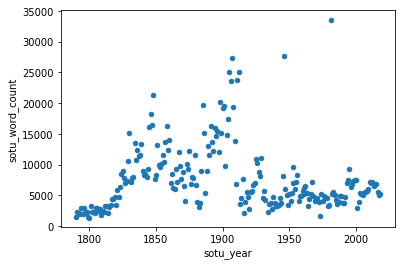

In [18]:
sotu_df.plot.scatter(y='sotu_word_count', 
                     x='sotu_year')

The scatter plot suggests there were two periods of increasing length, although address word count stabilized somewhat in the early part of the 20th century. There are also two historically anomalies, around 1950 and 1990.

The dataset can be subset to just a few informative columns and then the `sort_values` and `head`/`tail` methods can list the longest and shortest addresses.

In [19]:
sotu_df.sort_values(by='sotu_word_count').head(10)

,sotu_president,sotu_text,sotu_year,sotu_word_count
10,John_Adams,Gentlemen of the Senate and Gentlemen of the H...,1800,1372
0,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1790,1403
9,John_Adams,Gentlemen of the Senate and Gentlemen of the H...,1799,1505
184,Richard_Nixon,To the Congress of the United States:\n\nThe t...,1973,1655
19,James_Madison,Fellow-Citizens of the Senate and House of Rep...,1809,1831
3,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1793,1965
5,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1795,1986
7,John_Adams,Gentlemen of the Senate and Gentlemen of the H...,1797,2057
2,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1792,2098
14,Thomas_Jefferson,The Senate and House of Representatives of the...,1804,2101


In [20]:
sotu_df.sort_values(by='sotu_word_count', ascending = False).head(10)

,sotu_president,sotu_text,sotu_year,sotu_word_count
192,Jimmy_Carter,To the Congress of the United States:\n\nThe S...,1981,33564
155,Harry_S._Truman,To the Congress of the United States:\n\nA qua...,1946,27722
117,Theodore_Roosevelt,To the Senate and House of Representatives:\n\...,1907,27382
122,William_H._Taft,PART I\n\nTo the Senate and House of Represent...,1912,25150
115,Theodore_Roosevelt,To the Senate and House of Representatives:\n\...,1905,25033
121,William_H._Taft,PART I\n\nThis message is the first of several...,1911,23704
116,Theodore_Roosevelt,To the Senate and House of Representatives:\n\...,1906,23575
58,James_Polk,Fellow-Citizens of the Senate and of the House...,1848,21292
108,William_McKinley,To the Senate and House of Representatives:\n\...,1898,20208
95,Grover_Cleveland,To the Congress of the United States:\n\nYour ...,1885,19746


Presidents Carter and Truman are the culprits.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> In the data folder, there is a file called "trump_ge_speeches.json" which contains the general election speeches of Donald Trump.
What is the average (median) number of words in one of his speeches? 

</div>


#### Word frequencies

Word frequencies are the backbone of almost all text analysis. From topic models to text classification, counting how often certain words occur is a critical step in quantifying texts. While it is certainly possible to compute word frequencies using your own functions, that is usually unnecessary, as many Python libraries can compute words frequencies. 


If you don't really care about which specific words are in a text, but are mostly using them for subsequent statistical analysis, you'll likely need them in the first, wide format. Here each text is a row and each word a variable. This is the modal format for how text is interpreted as numbers. 

Alternatively, if you want to know about which specific words, or types of words, are most common, you might favor the second, long approach. 

In either case, note that the ordering of words in the original sentence. With few notable exceptions, analysts take what is called a bag-of-words approach. This simplifying assumption, that word order doesn't really matter, has two things going for it. First, it is computationally much easier to assume that order of words in a sentence doesn't matter. Second, the results, as you will see, are often pretty solid. Fields like sociology, which is based on the idea that individuals are shaped by their surroundings, analyze individual survey data frequently to great success. Bag-of-words is like that. We know context matters, but modeling strategies that ignore this can still provide fairly good estimates.

The scikit-learn library includes a fairly flexible tool for computing word frequencies. In data science lingo, variables are 'features', so `CountVectorizer` is categorized as a tool for text feature extraction. 

```America is strong, America is proud, and America is free.```

into something like:

| america | and | free | is | proud | strong |
|:-------:|-----|------|----|-------|--------|
| 3       | 1   | 1    | 3  | 1     |    1   |



```America is strong, America is proud, and America is free.```


|word|freq|
|---|---|
|america|3|
|and|1|
|free|1|
|is|3|
|proud|1|
|strong|1|

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

First, we set the parameters. This is where we assign rules such as whether or not all words should be converted to lower case and whether very rare or very common words should be excluded. By default, `CountVectorizer` includes all words, strips punctation, and converts to lower case. To keep these options, we don't need to include them, but code is often more readable when it is explicit. 

In [22]:
vectorizer = CountVectorizer(lowercase = True,
                             token_pattern = r'(?u)\b\w+\b',
                             max_df    = 1.0,
                             min_df    = 0.0)

We start off with some sample sentences.

In [23]:
sentences = ['America is strong and America is proud.', 
             'America is free.']

First, we build the vocabulary with `fit`. Critically, these does not produce any word counts, but only develops the words that it will count in subsequent passes. 

The `vectorizer` expects a list-like object (think variable with values for each case.)  

In [24]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

After `fit`, the `vectorizer` returns the full-set of parameters used to build the vocabulary list. The vocabulary itself is in `get_feature_names`. 

In [25]:
vectorizer.get_feature_names()

['america', 'and', 'free', 'is', 'proud', 'strong']

The second step is to `transform` a group of texts into an array based on the rules and vocabulary of the `vectorizer`. 

In [26]:
wf_array = vectorizer.transform(sentences)

Rather than a standard array/dataframe, `transform` returns a sparse matrix. This is because most texts will not include most words. As such, a normal dataset would be filled with zeroes, which would be fairly inefficient. In contrast, a sparse array includes only those cells with non-zero values. Each row is the coordinates of that cell (row, column) followed by the value. In practice, you never need to see one, but, because you often need to convert them to normal arrays, it is useful to know about them. 

In [27]:
print(wf_array)

  (0, 0)	2
  (0, 1)	1
  (0, 3)	2
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1


The sparse arrays can be converted to dense with the `todense` method. The dense version can be read by pandas and converted into a dataframe.

In [28]:
wf_array.todense()

matrix([[2, 1, 0, 2, 1, 1],
        [1, 0, 1, 1, 0, 0]])

This can be converted into a data frame.

In [29]:
pd.DataFrame(wf_array.todense())

,0,1,2,3,4,5
0,2,1,0,2,1,1
1,1,0,1,1,0,0


Since we did not provide column names, pandas filled in numbers. Fortunately, we can get the words associated with each position from `vectorizer.get_feature_names` to create meaningful variable names. This time, we store in a dataframe called `df`.

In [30]:
df = pd.DataFrame(wf_array.todense(),
                  columns=vectorizer.get_feature_names())

df

,america,and,free,is,proud,strong
0,2,1,0,2,1,1
1,1,0,1,1,0,0


Now that our word frequencies are in a dataframe, we can use the sum method to find the most commonly used words. 

In [31]:
df.sum()

america    3
and        1
free       1
is         3
proud      1
strong     1
dtype: int64

`sum` produces a pandas series that with the column totals. By default, this is the order of columns in the original dataframe, but we can also sort them by the column total. Since we want the largest values first, we set the `ascending` parameter to `False`.

In [32]:
df.sum().sort_values(ascending=False)

is         3
america    3
strong     1
proud      1
free       1
and        1
dtype: int64

Finally, we can create a variable in the dataframe with the original texts. Since `sentences` is a list of two items, and because we know the the order of `sentences` matches the order of `df`, it is fairly straightfoward to add the new column.

In [33]:
df['sentence'] = sentences

df

,america,and,free,is,proud,strong,sentence
0,2,1,0,2,1,1,America is strong and America is proud.
1,1,0,1,1,0,0,America is free.


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Use a vectorizer and dataframe to find the most common word in these sentences.

<code>seuss_sen = ['This one has a little star.', 
             'This one has a little car.', 
             'Say!',
             'What a lot of fish there are.']</code>
            
</div>

We can now fit our vectorizer on a different set of data, the State of the Union addresses. Fortunately, scikit-learn functions can read data directly from a pandas dataframes.

In [34]:
vectorizer.fit(sotu_df['sotu_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

This rebuilt our vocabulary list, which is now much longer.

In [35]:
len(vectorizer.get_feature_names())

24989

We can use slice to examine an arbitrary section of the vocabulary.

In [36]:
vectorizer.get_feature_names()[12501:12510]

['installing',
 'installment',
 'installments',
 'instance',
 'instances',
 'instant',
 'instantaneous',
 'instantly',
 'instead']

As before, we next `transform` our corpus to a dense array using the `vectorizer`. Note that while we are building and transforming on the same data, this doesn't have to be the case.

In [37]:
frequency_array = vectorizer.transform(sotu_df['sotu_text'])

In [38]:
frequency_array

<230x24989 sparse matrix of type '<class 'numpy.int64'>'
	with 400529 stored elements in Compressed Sparse Row format>

`frequency_array` has 39,8287 cells that are not empty which works out to be 7% of the 5,739,420 of possible cells (230 speeches being coded for the presence of 24,954 words.)

As before, this array can be turned into a data frame. This time, we supply an index from the index of the original data frame (`sotu_df`) in case we want to link records later on.

In [39]:
word_freq_df = pd.DataFrame(frequency_array.toarray(),
                            columns = vectorizer.get_feature_names(),
                            index = sotu_df.index)

In [40]:
word_freq_df.head()

,0,00,000,0000,0001,001,002,003,004,005,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
word_freq_df.head()

,0,00,000,0000,0001,001,002,003,004,005,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
word_freq_df.sum().sort_values(ascending=False)[:20]

the      150523
of        97132
and       61188
to        61018
in        38828
a         28157
that      22111
for       19081
be        18727
our       17484
is        17476
it        15577
by        15037
we        12699
have      12388
which     12331
as        12237
this      12156
with      12050
will       9709
dtype: int64

As you might notice, the most frequently used words are boring. At the other end, are the almost 10,000 words that are used in only one or two speeches. For analytic purposes, these words are excluded from analysis. We can do this by changing some parameters in the vectorizer. 

In [43]:
vectorizer = CountVectorizer(lowercase    = True,
                             stop_words   = 'english',
                             max_df       = .98,
                             min_df       = .02)

Stop words is the term for frequently occuring words that usually provide little analytical leverage, such as "about", "becoming" or "do". Sklearn includes a [list](http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words) of 318 English language words. Alternatively, you could provide your own list for this parameter. `max_df` can be used to ignore words that occur about a maximum document frequency. In this case, I'm excluding words that occur in more than 99% of addresses. This is an excellent way to identify corpus specific stop words. In this case, it is likely those associated with the specific form of the address, and likely includes words such as "congress" or "country." At the other end of the extreme, `min_df` sets the minimum number of documents a word must appear in before it is included in the vocabulary list. A value of .02 means that words that occuring in fewer than 2% of speeches are excluded. Alternatively, I could have provided an interger, such as `5`, meaning that a word must appear in at least five speeches.

After reparameterizating the vectorizer (quite a mouthful!), fit the data again.

In [44]:
vectorizer.fit(sotu_df['sotu_text'])
len(vectorizer.get_feature_names())

10906

The number of words was more than cut in half. 

In [45]:
frequency_array = vectorizer.transform(sotu_df['sotu_text'])

In [46]:
word_freq_df = pd.DataFrame(frequency_array.toarray(),
                            columns = vectorizer.get_feature_names(),
                            index = sotu_df.index)

In [47]:
word_freq_df.sum().sort_values(ascending=False)[:20]

people      4076
year        3997
public      3084
new         2987
000         2944
war         2820
american    2704
world       2531
years       2304
national    2152
law         2086
present     2083
power       1982
shall       1916
peace       1890
general     1854
citizens    1852
make        1850
work        1848
act         1834
dtype: int64

The most common words also now look more like things you would expect in presidential addresses. Additionally, note that "000" occurs. This is because our `vectorizer` is splitting long numbers into multiple words where the comma is. So "1,000,000" is become three words: "1", "000", "000". If you really cared about this, you could go back and edit the text using search and replace or regular expressions to clean it up. 

We can create a new dataframe that merges our better word frequencies with the original SOTU dataframe. pandas `concat` takes a list of dataframes and merges them. The value of `axis=1` means that datasets should be merged sided by side -- each data set is providing new columns, not new rows. Critically, `concat` assumes that the cases are in the same order in each of the dataframes. If this is not the case (or you are not sure), and you are merging based on a the value of column, you should use `merge`.

In [48]:
df_combined = pd.concat([sotu_df, word_freq_df], axis=1)

In [49]:
df_combined.head()

,sotu_president,sotu_text,sotu_year,sotu_word_count,00,000,002,007,009,01,...,youthful,youths,yukon,zeal,zealand,zealous,zealously,zero,zone,zones
0,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1790,1403,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1791,2303,0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1792,2098,0,2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1793,1965,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,George_Washington,Fellow-Citizens of the Senate and House of Rep...,1794,2915,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


If you wanted to stop here, either to pick up your analysis on a different day or to complete your work in a different program, you could export the combined dataframe. if you wanted to keep the address text in your file, I would recommend storing it as JSON to avoid potential issues with that long text field. `orient='records'` ensures that each item in the JSON will be a case. 

In [50]:
df_combined.to_json('sotu_wf.json', orient='records')

Alternatively, if you didn't care about the text, or new you already had it saved in the original json file, you can drop the text field and export to a csv file. `axis=1` tells pandas that you want to drop a column, rather than a row.

In [51]:
df_combined.drop('sotu_text', axis=1).to_csv('sotu_wf.csv')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> What were the most common words used by Donald Trump in his speeches?

</div>

An alternate strategy to removing words entirely is construct weights that are based on how frequently a word occurs in a particular document compared to how frequently it appears in other documents. So a word like "of" would score low in every document if it commonly found and used in similar frequencies. A word like "America" might be used in every text, but some addresses might use it more frequently, it which case it would score high in just those instances. Finally, the highest scores would be associated with a word like "terrorism" might be not only rare, but also appear frequently in the few addresses that include it.  

The most common algorithm for this sort of word weight is called term-frequency/inverse document frequency, or TF-IDF. The numerator, term frequency, is how frequently a word occurs in a document divided by the number of words in the document. The denominator is the natural log of the fraction of the total number of documents divided by the number of documents with term in it. 

Returning to our two sample sentences:

Scikit-learn's `TfidfVectorizer` can be used to compute tf-idfs with identical syntax to the `CountVectorizer`.

![](http://dovgalecs.com/blog/wp-content/uploads/2012/03/img131.gif)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf_vectorizer = TfidfVectorizer()

In [54]:
tfidf_vectorizer.fit(sentences)

tfidf_array = tfidf_vectorizer.transform(sentences)

             

In [55]:
pd.DataFrame(tfidf_array.todense(),
             columns = tfidf_vectorizer.get_feature_names())

,america,and,free,is,proud,strong
0,0.535941,0.376623,0.000000,0.535941,0.376623,0.376623
1,0.501549,0.000000,0.704909,0.501549,0.000000,0.000000


The highest score goes to "free" in the second sentence, as not only it is it 1/3 of the words, but it also absent from the other document. 

As before, we can create apply the vectorizer to the SOTU addresses. I exclude stop words because, even with the idf adjustments, they still can overwhelm the results.

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words= 'english')

In [57]:
tfidf_vectorizer.fit(sotu_df['sotu_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [58]:
tfidf_df = pd.DataFrame(tfidf_vectorizer.transform(sotu_df['sotu_text']).todense(),
                        columns = tfidf_vectorizer.get_feature_names())

As before, the original dataframe and the tf-idf dataframe can be combined with `concat`.

In [59]:
df_combined = pd.concat([sotu_df, tfidf_df], axis=1)

In [60]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Columns: 24656 entries, sotu_president to zuloaga
dtypes: float64(24652), int64(2), object(2)
memory usage: 43.3+ MB


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a tf-idf dataframe from the trump speeches. Do it!

</div>



The `sum` method that was used for the word frequencies to find the most important words is less informative here. tf-idf is meant to identify important words within a text, rather than the most important words in an entire corpus, so the meaning of summing the values across multiple texts is not apparent.However, we can use them to identify the most uniquely informative words within a given text. 

The most useful way to analyze the most informative words (based on tf-idf) is to switch the dataframe from wide (where each case is a speech, to long, where each row is a word-case.  For our two sentence example, the result would look like this:



| sentence |	word|	value|
|-|-|-|
|0|	america|	0.535941
|0|	is	|0.535941
|0|	and|	0.376623
|0	|proud	|0.37662
|	0|	strong|	0.376623
|0|	free	|0.000000
|	1|	free|	0.704909
|	1|	america|	0.501549
|	1|	is|	0.501549
|	1|	and|	0.000000
|	1|	proud|	0.000000
|	1|	strong	|0.000000

The first sentence is about what "america" "is" while the second is about "free". 

In pandas, the `melt` method is used to convert a dataframe from wide to long. The first parameter is the name of the dataframe. `id_vars` is the variable or variables that will be used to identify the cases. In this case, that is `sotu_year`, which uniquely identifies each row. `value_vars` are the variables to be transposed. In this case, we only want the word variables, which are still stored in the `tfidf_vectorizer.get_feature_names()` list.

In [61]:
df_long = pd.melt(df_combined, 
                  id_vars='sotu_year', 
                  value_vars=tfidf_vectorizer.get_feature_names())


In [62]:
df_long.head()

,sotu_year,variable,value
0,1790,00,0.0
1,1791,00,0.0
2,1792,00,0.0
3,1793,00,0.0
4,1794,00,0.0


The new dataframe is quite long.

In [63]:
len(df_long)

5669960

Most of that, however, is zeros, so we can drop those cases.

In [64]:
df_long = df_long[df_long['value']!= 0]

len(df_long)

356039

For display purposes, it is also useful to set the word variable (which pandas renamed to `variable` as part of the `melt` as the index.

In [65]:
df_long.set_index('variable', inplace= True)
df_long.head()

,sotu_year,value
variable,,
00,1880,0.020108
00,1881,0.306885
00,1882,0.452874
00,1883,0.458578
00,1884,0.015407


Now, we can use `groupby` and `nlargest` to find the most important word, as measured by tf-idf value, for each year.

In [66]:
df_long.groupby('sotu_year')['value'].nlargest(5)

sotu_year  variable     
1790       kentucky         0.117869
           militia          0.116685
           requisite        0.111104
           consuls          0.105274
           attachment       0.099320
1791       states           0.194833
           united           0.184807
           subscriptions    0.137851
           objects          0.124032
           provision        0.112637
1792       chickamaugas     0.139889
           provision        0.126599
           proper           0.100720
           information      0.099347
           subject          0.097114
1793       states           0.302194
           united           0.278213
           shall            0.108190
           warmest          0.106906
           liberate         0.104253
1794       militia          0.210568
           pennsylvania     0.208337
           states           0.167961
           inspector        0.143016
           united           0.133176
1795       indians          0.196307
           tr

I'm not that familiar with the early years of the republic, so the analysis can be limited to the most recent inaugaural years. 

In [67]:
inaugaration_years = [1977, 1981, 1989, 1993, 2001, 2009, 2017]

df_inaugaration = df_long[ df_long['sotu_year'].isin(inaugaration_years) ]

In [68]:
df_inaugaration.groupby('sotu_year')['value'].nlargest(5)

sotu_year  variable      
1977       energy            0.189392
           president         0.163595
           strategic         0.154868
           today             0.121060
           congress          0.118501
1981       1980              0.226320
           administration    0.164795
           program           0.152728
           programs          0.140324
           soviet            0.132398
1989       tonight           0.284489
           america           0.218648
           budget            0.174209
           let               0.147870
           drugs             0.144559
1993       jobs              0.209817
           people            0.184011
           deficit           0.163053
           investment        0.139919
           percent           0.138959
2001       terrorists        0.265787
           tonight           0.222926
           terror            0.177895
           americans         0.153074
           qaida             0.147483
2009       know         

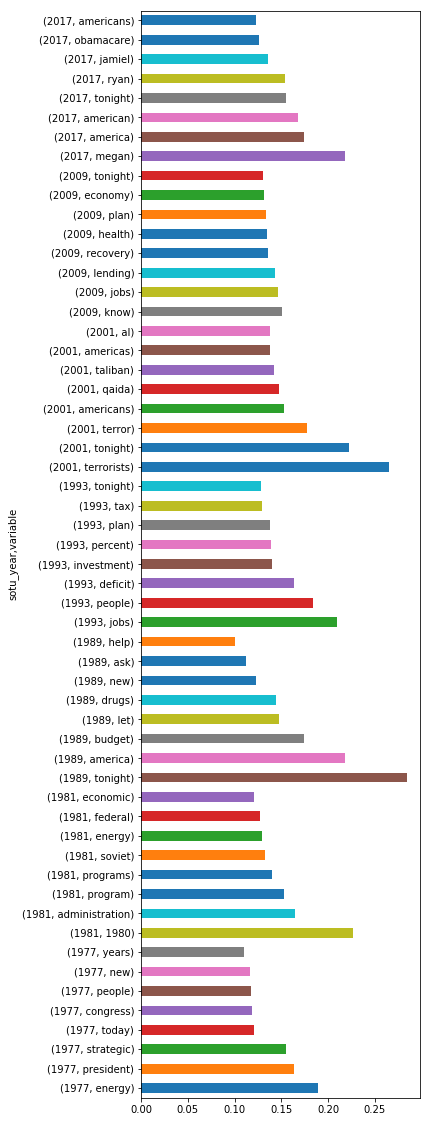

In [69]:
df_inaugaration.groupby('sotu_year')['value'].nlargest(8).plot.barh(figsize=(5,20))

### Bonus Visualization - TSNE


The TSNE algorithm in scikit-learn follows the same logic of as the vectorizers:
1. Establish the parameters. In this case, we want to reduce or data to two dimensions.
2. Fit the model on the data.
3. Transform the data to the two dimensions. 




As noted above, one major use for term frequency and tf-idf arrays is as an intermediary step for subsequent analysis, such as text classification or topic models. These arrays are often very wide, meaning they have hundreds or thousands of columns, each associated with a distinct word. Analysis often use a second intermediary step in order to reduce the number of variables, using techniques such as principle component analysis (PCA). TSNE, t-distributed stochastic neighbor embedding, is an alternative algorithm for data reduction that is designed for visualization. It is usually used to reduce the number of variables to two, which become the x and y values for graphing. While the co-ordinates themselves have no meaning, similar cases are presented as clustered together.  

The TSNE algorithm in scikit-learn follows the same logic of as the vectorizers:
1. Establish the parameters. In this case, we want to reduce or data to two dimensions.
2. Fit the model on the data.
3. Transform the data to the two dimensions. 

For many scikit-learn functions, steps 2 (`fit`) and 3 (`transform`) can be combined with the `fit_transform` method, which we will use here.

In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE(n_components=2)

In [72]:
coordinates = tsne.fit_transform(tfidf_df)

In [73]:
coordinates[:10]

array([[-15.743554 ,  15.046603 ],
       [-13.368821 ,  14.946587 ],
       [-12.693366 ,  15.6549425],
       [ -9.696101 ,  12.482419 ],
       [ -8.252132 ,  12.2527685],
       [-14.5627365,  15.672341 ],
       [-14.645704 ,  17.25603  ],
       [-13.702745 ,  19.313482 ],
       [-14.084031 ,  19.285786 ],
       [-12.786504 ,  19.198757 ]], dtype=float32)

These coordinates can be stored in a dataframe.  

In [74]:
tsne_df = pd.DataFrame(coordinates, 
                       columns=['tsne_y', 'tsne_x'])

In [75]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
tsne_y    230 non-null float32
tsne_x    230 non-null float32
dtypes: float32(2)
memory usage: 1.9 KB


Once in a dataframe, the tsne co-ordinates can be plotted. I use the `fig_size` option to ensure the result are square.  

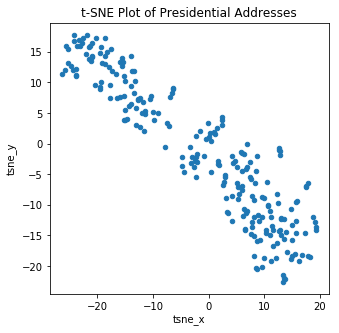

In [76]:
tsne_df.plot.scatter(y='tsne_y', 
                     x = 'tsne_x', 
                     title ='t-SNE Plot of Presidential Addresses',
                     figsize=(5,5)
                     ) 

Without year variables, this doesn't tell us much about the patterning of speeches. We can copy over the year variable from the original dataset.

In [78]:
tsne_df['year'] = sotu_df['sotu_year']
tsne_df['year'].describe()

count     230.000000
mean     1904.334783
std        66.263772
min      1790.000000
25%      1847.250000
50%      1904.500000
75%      1961.000000
max      2018.000000
Name: year, dtype: float64

Ideally, the graph would allow you to select an individual point to find out the year, the president, and the text of the speech. This is possible with some graphing libraries, such as [bokeh](https://bokeh.pydata.org/en/latest/) or [plotly](https://plot.ly), but beyond the scope of this chapter.

Rather than labeling each point, we can bin them using the pandas `cut` method. For this case, I create ten different groups stored in the new variable `era`.

In [102]:
tsne_df['era'] =  pd.cut(tsne_df['year'], 10)

[seaborn](https://seaborn.pydata.org) is a popular visualization library that makes the standard python plots prettier and easier to use. It also has the most convient method for coloring points in a scatterplot using a third variable, such as era.

By convention, seaborn is imported as `sns`.

In [103]:
import seaborn as sns

`pairplot` can be used to produce a matrix of correlations, but we are only interested in our t-SNE coordinates. Note the syntax is slightly different here, as the x and y are just the column names and the dataframe name is set through the `data` parameter. 

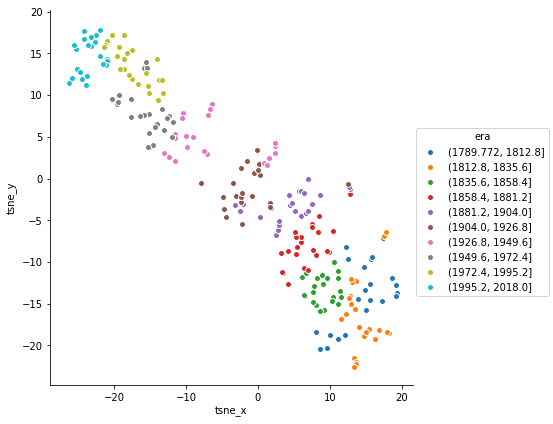

In [105]:
sns.pairplot(x_vars = 'tsne_x', 
             y_vars = 'tsne_y', 
             data   =  tsne_df, 
             hue    =  'era', 
             size=6)

This plot suggest that the language of presidential address is largely driven by temporal trends, rather than by party or region. A break seems to have occurred around the early 1920. A close inspection of this time period, through an examination of word frequencies or other quantitative or qualitative methods of text analysis, might suggest what the substance of the shift identified here.   

### Bonus: Bigrams

You might be interested not only in the frequency of certain words, but also word pairs with a distinct meaning, such as African American or United States. These word pairs are called bigrams, are more generally, ngrams.

If you have are familiar with your corpus and have a finite number of ngrams you want to handle, the best strategy is to preprocess the text yourself by writing a function that turns each of your ngrams into a single word.

In [82]:
def my_ngrams(text):
    '''Replace ngrams in a string with unigrams'''
    text = text.replace("African American", "AfricanAmerican")
    text = text.replace("United States", "UnitedStates")
    text = text.replace("House of Representatives", "HouseofRepresentatives")
    return text

sotu_df['clean_sotu_text'] = sotu_df['sotu_text'].apply(my_ngrams)

The above function does a series of replaces, one for each ngram that you want to fix. Alternatively, you could create a list of the ngrams and then loop through them. This method scales up to larger lists much better and avoids lines of duplicate code. It also takes advantage of the fact that the replacement text is the original text with the spaces removed (or replacing `' '` with `''`). 

In [83]:
ngrams = ['African American', 'United States', 'House of Representatives']

def my_ngrams2(text):
    '''Replace ngrams in a string with unigrams'''
    for ngram in ngrams:
        replacement = ngram.replace(' ','')
        text = text.replace(ngram, replacement)
    return text
sotu_df['clean_sotu_text'] = sotu_df['sotu_text'].apply(my_ngrams2)

Subsequent text analysis would be done on the new variable `clean_sotu_text` rather than the original, untransformed version.

Alternatively, you may want to identify ngrams in a more algorithmic way, either to identify candidates for your custom function or to use in your analysis. Both of scikit learns text vectorizers include an option to identify ngrams, `ngram_range`. It takes a pair of values, the first is the minimum value (where 1 is a single word) and the second is the maximum number. So `(1,2)` would construct a vocabulary of all unigrams and bigrams, while `(3,3)` would be only trigrams.

To identify the most common bigrams, we can rerun the analysis above, but this time setting with `ngram_range = (2,2)` as a parameter for the `CountVectorizer`.

In [84]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (2,2),
                             stop_words  = 'english'
                             )

In [85]:
bi_tf = vectorizer.fit_transform(sotu_df['sotu_text'])

In [86]:
bi_tf_df = pd.DataFrame(bi_tf.todense(),
                        columns = vectorizer.get_feature_names())

In [87]:
bi_tf_df.sum().sort_values(ascending=False)[:10]

united states            4494
000 000                  1004
fiscal year               748
great britain             517
federal government        402
american people           389
fellow citizens           293
june 30                   287
report secretary          284
house representatives     274
dtype: int64

Note that 'house representatives' likely was 'House of Representatives" in the original text, but the stop words removal happened prior to the ngram process. 

Replicating the process with both unigrams and ngrams:

In [88]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,2),
                             stop_words  = 'english'
                             )
bi_tf = vectorizer.fit_transform(sotu_df['sotu_text'])

bi_tf_df = pd.DataFrame(bi_tf.todense(),
                        columns = vectorizer.get_feature_names())

bi_tf_df.sum().sort_values(ascending=False)[:10]

government       7081
states           6476
congress         5003
united           4820
united states    4494
people           4076
year             3997
country          3436
great            3258
public           3084
dtype: int64

Subsequent sections will discuss ways to decide how to algorithmically decide what are the best values for different vectorizer options, such as ngrams range or whether to include stop words or not.

### Bonus: Stemming

Should you count 'Americans' the same as "American"? Should "runs" and "run" be combined in your count? Having both singular and plural versions of the same noun or multiple variants of a verb can often clutter your analysis, particularly when looking at the most frequent words. In a large, diverse corpus, an article about "immigration" probably should be grouped with one about "immigrants", although this relationship might be obscured because of word variations. 

Two common strategies for handling this issues are stemming and lemmatization.  Stemming is a rule-based method to chop off the end of a word, such as removing "ing" at the end of a word so that "falling" becomes "fall" or the "d" for words that fit a pattern of constant followed by a "ed", such as "conflated" becomes "conflate" but "feed" does not become "fee". 

In contrast, lemmatization is a process of identifying the dictionary form of a word, or lemma. So while a stemmer might turn "communities" into "commun", the lemma is "community". Lemmatization works best with knowledge of the part of speech, as the lemma of the verb "saw" is "see", while the lemma of the noun "saw" is "saw".

Both methods have strengths and weaknesses. Stemming is fast and bins many related words together, but it can be too aggressive in chopping and the stems are often non-obviously interpretable. In contrast, lemmatization can be quite computationally intensive, especially when the text need to be part-of-speech tagged first. In practice, neither is commonly used, although they are useful tools to have knowledge of.

Both stemming and lemmatazation are available in Python through NLTK, the Natural Language Tool Kit. There are several variants of each available, but the most common are the `PorterStemmer` and the `WordNetLemmatizer`.

Note: If this is the first time you are using either, you will need to download auxilary files for them first.

```
import nltk
nltk.download('punkt')
nltk.download('wordnet')
```

In [89]:
from nltk.stem.snowball import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [90]:
stemmer = PorterStemmer()

In [91]:
stemmer.stem('falls')

'fall'

In [92]:
stemmer.stem('organizing')

'organ'

In [93]:
lemmer = WordNetLemmatizer()

In [94]:
lemmer.lemmatize('falls')

'fall'

In [95]:
lemmer.lemmatize('organizing')

'organizing'

As you can see, both have similar syntax, although the lemmatizer also has the capacity to accept a part-of-speech tag. If defaults to assuming things are a noun. If the word is not found it its dictionary as a noun, it returns the original word. However, we can produce the verb lemma.

In [96]:
lemmer.lemmatize('organizing', 'v')

'organize'

Incorporating stemming or lemmatization in vectorizer requires passing a custom tokenizer. The standard tokenizer takes a text string, strips the punctuation and other one-character words, and returns a list of words. So to create a custom stemming tokenizer, we need a function that does the same but also stems each word.

In my `tokenize`, I use `word_tokenize` from nltk to split the sentences into words. The second line stems each word, excluding those tokens that are punctuation or stop words. This second second line uses list comprehension, a concise way to speed up list creation without using `for` loops. The one I employ below is equivalent to:

``` 
stems = []
for w in words:
    if keep(w) == True:
        s = stemmer.stem(w)
        stems.append(s)
```
\[Personally, I find it easier to read a `for` loop, but list comprehensions are fast and pithy.\]

In [97]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

stemmer = PorterStemmer()

stop_words = stopwords.words('english')

def keep(word):
    '''Test whether a token is a stop word or punctuation'''
    if word in punctuation:
        return False
    elif word in stop_words:
        return False
    return True
    
def tokenize_and_stem(text):
    '''Tokenize and stem a text returning a word list.'''
    words = word_tokenize(text)
    stems = [stemmer.stem(w) for w in words if keep(w) == True]
    stems 
    return stems

We can test that `tokenize` returns what we expect it to:

In [98]:
tokenize_and_stem('America is strong because Americans work hardest under adversity.')

['america', 'strong', 'american', 'work', 'hardest', 'advers']

The `tokenize` function can be added as an option for a count vectorizer.

In [99]:
stem_vectorizer = CountVectorizer(tokenizer = tokenize_and_stem)

In [100]:
stem_tf = stem_vectorizer.fit_transform(sotu_df['sotu_text'])

stem_tf = pd.DataFrame(stem_tf.todense(),
                       columns = stem_vectorizer.get_feature_names())

In [101]:
stem_tf.sum().sort_values(ascending=False)[:20]

state       8805
govern      7955
year        6198
nation      6079
congress    5019
unit        5011
countri     4445
peopl       4262
upon        3957
would       3813
--          3651
american    3513
law         3467
may         3400
time        3323
great       3309
must        3272
public      3146
made        3143
power       3093
dtype: int64

Big winners here is "state" as the combination of "states" and "state", along with a few "stated". "Nation" combines "nation" and "nations" plus "national" and a few "nationality", but no "nationwide", which stems to "nationwid".